In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#. reading our dataset from the corresponding txt file: test_1, test_2, has_admitted

In [3]:
path = 'ex2data2.txt'
learning_data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
print learning_data.head()

     Test 1   Test 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1


Scatter plotting our dataset helps to identify certain patterns

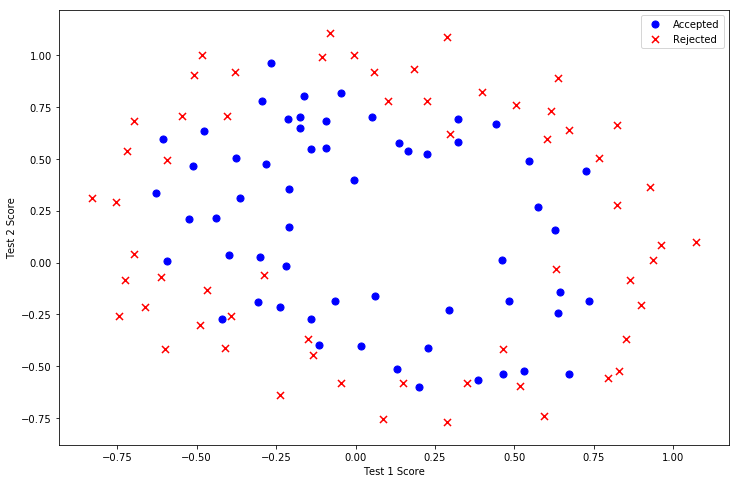

In [5]:
positive = learning_data[learning_data['Accepted'].isin([1])]
negative = learning_data[learning_data['Accepted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

Note: notice that there is no linear decision boundary that will perform well on this data.
One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features

In [9]:
degree = 5
x1 = learning_data['Test 1']
x2 = learning_data['Test 2']
learning_data.insert(3, 'Ones', 1)
for i in range(1, degree):
    for j in range(0, i):
        learning_data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

In [12]:
learning_data.drop('Test 1', axis=1, inplace=True)
learning_data.drop('Test 2', axis=1, inplace=True)

ValueError: labels ['Test 1'] not contained in axis

In [13]:
print learning_data.head()

   Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   

        F40       F41       F42       F43  
0  0.000007  0.000094  0.001286  0.017551  
1  0.000074 -0.000546  0.004035 -0.029801  
2  0.002086 -0.006757  0.021886 -0.070895  
3  0.019775 -0.026483  0.035465 -0.047494  
4  0.069393 -0.062956  0.057116 -0.051818  
